# Atividade: Caminho Cego em uma Matriz

## Objetivo

Implementar um algoritmo que simula o movimento de um robô dentro de uma **matriz 5x5**, onde:

- `0` representa caminhos livres
- `1` representa obstáculos
- A saída está sempre no canto **inferior direito** (posição `[4][4]`)
- O robô começa no canto **superior esquerdo** (`[0][0]`)

---

## Regras do Jogo

- O robô **não vê a matriz inteira**, ele segue um algoritmo "cego"
- Prioridade de movimento: **direita > baixo > esquerda > cima**
- O robô **não pode visitar a mesma célula duas vezes**
- Quando encontra um beco sem saída, o robô deve **voltar (backtracking)**

---

## Exemplo de Mapa

```python
matriz = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]


In [ ]:
# SOLUÇÃO RECURSIVA
matriz = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

visitado = [[False for _ in range(5)] for _ in range(5)]

# print(visitado)

caminho = []

def mover(x, y):

    if x == 4 and y == 4:
        caminho.append((x, y))
        return True

    if x < 0 or x >= 5 or y < 0 or y >= 5:
        return False
    if matriz[x][y] == 1 or visitado[x][y]:
        return False

    visitado[x][y] = True
    caminho.append((x, y))

    if mover(x, y + 1): return True
    if mover(x + 1, y): return True
    if mover(x, y - 1): return True
    if mover(x - 1, y): return True

    caminho.pop()
    return False

if mover(0, 0):
    print("Caminho encontrado:")
    for x, y in caminho:
        matriz[x][y] = '*'
else:
    print("Não há caminho até a saída.")

for linha in matriz:
    print(' '.join(str(c) for c in linha))

[[False, False, False, False, False], [False, False, False, False, False], [False, False, False, False, False], [False, False, False, False, False], [False, False, False, False, False]]
Caminho encontrado:
* 1 0 0 0
* 1 0 1 0
* * * 1 0
1 1 * 1 0
0 0 * * *


# Atividade 4 – Caminho Cego em uma Matriz

## Objetivo
Simular um robô que precisa encontrar a saída em uma matriz 5x5, representada por caminhos livres (`0`) e obstáculos (`1`). O robô começa no canto superior esquerdo (`[0][0]`) e precisa chegar ao canto inferior direito (`[4][4]`), seguindo a ordem de movimento:

> **Direita → Baixo → Esquerda → Cima**

---

## Estratégia da Solução

Utilizamos um **algoritmo recursivo com backtracking**, ou seja, o robô tenta avançar em uma direção. Se der errado, ele **"volta"** e tenta outras opções.

### Componentes da Solução:

1. **Matriz original** com os caminhos (`0`) e obstáculos (`1`).
2. **Matriz auxiliar** (`visitado`) para lembrar onde o robô já passou.
3. **Lista `caminho`** para registrar as coordenadas visitadas com sucesso.
4. **Função `mover(x, y)`** que tenta seguir as regras e encontrar o caminho.

---

## Regras de movimento

A cada passo, a função tenta mover na seguinte ordem de prioridade:

1. Direita (`y + 1`)
2. Baixo (`x + 1`)
3. Esquerda (`y - 1`)
4. Cima (`x - 1`)

Se todas as opções falharem, ela desfaz o último passo com `caminho.pop()` (backtracking).

---

## Resultado Esperado

Ao executar a função, o programa deve:

- Informar se foi possível encontrar a saída
- Substituir os `0` do caminho correto por `*`
- Exibir a matriz final com o caminho percorrido

In [ ]:
matriz = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

visitado = [[False for _ in range(5)] for _ in range(5)]
pilha = [(0, 0)]
caminho = []

# Direções: direita, baixo, esquerda, cima
direcoes = [(0, 1), (1, 0), (0, -1), (-1, 0)]

while pilha:
    x, y = pilha[-1]  # pega o topo da pilha

    # Se já foi visitado, volta
    if visitado[x][y]:
        pilha.pop()
        continue

    visitado[x][y] = True
    caminho.append((x, y))

    # Verifica se chegou na saída
    if (x, y) == (4, 4):
        break

    encontrou_proximo = False
    for dx, dy in direcoes:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 5 and 0 <= ny < 5:
            if matriz[nx][ny] == 0 and not visitado[nx][ny]:
                pilha.append((nx, ny))
                encontrou_proximo = True
                break

    # Se não encontrou onde ir, volta
    if not encontrou_proximo:
        pilha.pop()
        caminho.pop()

# Marca o caminho encontrado
if caminho and caminho[-1] == (4, 4):
    for x, y in caminho:
        matriz[x][y] = '*'
    print("Caminho encontrado:")
else:
    print("Não há caminho até a saída.")

# Imprime a matriz com o caminho marcado
for linha in matriz:
    print(' '.join(str(c) for c in linha))

Caminho encontrado:
* 1 0 0 0
* 1 0 1 0
* * * 1 0
1 1 * 1 0
0 0 * * *


# Solução Iterativa (Sem Recursão)

## Objetivo

Simular o movimento de um agente em uma matriz 5x5, tentando encontrar um caminho do canto superior esquerdo `(0,0)` até o canto inferior direito `(4,4)`, **sem visão global do ambiente** e seguindo uma regra de prioridade de movimento:

```
Prioridade: Direita → Baixo → Esquerda → Cima
```

---

## Lógica do Algoritmo

### 1. **Representação da Matriz**

- A matriz é uma lista de listas, onde:
  - `0` representa um caminho livre
  - `1` representa um obstáculo
- A saída está sempre em `(4,4)`

```python
matriz = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]
```

---

### 2. **Estruturas de Apoio**

- `visitado`: marca as posições já exploradas (`True` ou `False`)
- `pilha`: simula o caminho atual do agente (estrutura LIFO)
- `caminho`: guarda o caminho válido até o destino (quando encontrado)

---

### 3. **Estratégia de Navegação**

O agente inicia em `(0,0)` e segue as **regras de prioridade de movimento**. A cada passo:

1. Verifica a célula no topo da pilha.
2. Se já foi visitada, volta (backtracking).
3. Se não foi visitada:
   - Marca como visitada.
   - Testa as quatro direções, na ordem: direita, baixo, esquerda, cima.
   - Se encontrar uma célula livre e não visitada, empilha e continua.
4. Se não houver opções, desempilha (volta).

---

### 4. **Critério de Parada**

O algoritmo para quando:

- A célula atual é `(4,4)` → **solução encontrada**
- A pilha está vazia → **não há solução**

---

### 5. **Marcação da Solução**

Se um caminho for encontrado, os pares `(x, y)` armazenados na lista `caminho` são marcados com `'*'` na matriz original, indicando visualmente o trajeto feito.

---

## Exemplo de Saída

```
* 1 0 0 0
* 1 0 1 0
* * * 1 0
1 1 * 1 0
0 0 * * *
```

<ipython-input-6-2715fed4c83b>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray_r', 3)


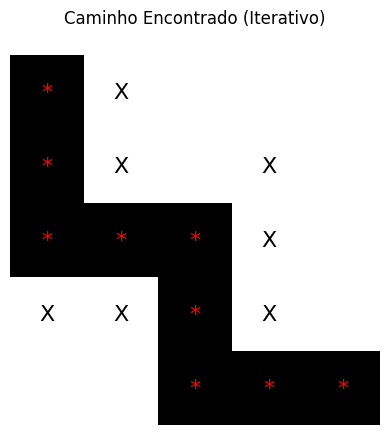

In [ ]:
# VERSÃO VISUAL COM MATPLOTLIB
# Reexecutar após reset
import matplotlib.pyplot as plt
import numpy as np

# Matriz base com obstáculos (1) e caminhos livres (0)
matriz = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

visitado = [[False for _ in range(5)] for _ in range(5)]
pilha = [(0, 0)]
caminho = []
direcoes = [(0, 1), (1, 0), (0, -1), (-1, 0)]

while pilha:
    x, y = pilha[-1]

    if visitado[x][y]:
        pilha.pop()
        continue

    visitado[x][y] = True
    caminho.append((x, y))

    if (x, y) == (4, 4):
        break

    encontrou_proximo = False
    for dx, dy in direcoes:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 5 and 0 <= ny < 5:
            if matriz[nx][ny] == 0 and not visitado[nx][ny]:
                pilha.append((nx, ny))
                encontrou_proximo = True
                break

    if not encontrou_proximo:
        pilha.pop()
        caminho.pop()

matriz_visual = np.array(matriz, dtype=int)

if caminho and caminho[-1] == (4, 4):
    for x, y in caminho:
        matriz_visual[x][y] = 9

fig, ax = plt.subplots()
cmap = plt.cm.get_cmap('gray_r', 3)
c = ax.matshow(matriz_visual, cmap=cmap, vmin=0, vmax=9)

for i in range(5):
    for j in range(5):
        valor = matriz_visual[i, j]
        if valor == 1:
            texto = 'X'
        elif valor == 9:
            texto = '*'
        else:
            texto = ''
        ax.text(j, i, texto, va='center', ha='center', color='red' if texto == '*' else 'black', fontsize=16)

plt.title("Caminho Encontrado (Iterativo)")
plt.axis('off')
plt.show()